# Laboratorio #3
### Análisis de Datos con Python
> *Estudiante: Víctor Manuel Rodríguez Umaña*

> *Carnet: 24007670*

> *Curso: Ciencia de Datos en Python*

## Parte 1: Numpy

In [101]:
import numpy as np

### Ejercicio 1
¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [4]:
booleanos = np.zeros(1000, dtype='bool')
booleanos.nbytes

1000

### Ejercicio 2
Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [7]:
pares = np.arange(100, 1, -2)
print(pares[-10:])

[20 18 16 14 12 10  8  6  4  2]


### Ejercicio 3
Dado el array  
    2  4  5  6     
    0  3  7  4      
    8  8  5  2      
    1  5  6  1  
Seleccione con una instrucción el subarray de elementos  
    0  3  7  4  
Después, seleccione el subarray de elementos  
    2  5  
    8  5

In [14]:
x = np.array([[[2,4,5,6],
               [0,3,7,4]],
              [[8,8,5,2],
               [1,5,6,1,]]
             ])

In [15]:
x[0,1]

array([0, 3, 7, 4])

In [23]:
[[x[0,0,0], x[0,0,2]], [x[1,0,0], x[1,0,2]]]

[[2, 5], [8, 5]]

### Ejercicio 4
Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [25]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
np.mean(a-b)

-0.25

### Ejercicio 5
Tengo valores de cordenadas (x, y) en las columnas del array  
    1.33 4.5  
    30.0 10.7  
    70.2 0.5  
    Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [58]:
coordenadas = np.array([[1.33, 4.5],
                        [30.0, 10.7],
                        [70.2, 0.5]
                       ])
coordenadas = np.vstack((coordenadas, [37.1, -3.6]))
coordenadas

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

In [59]:
coordenadas.shape

(4, 2)

### Ejercicio 6.
Copie el array del ejercicio anterior. Traspóngalo.Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [64]:
transpuesto = np.transpose(coordenadas)
transpuesto

array([[ 1.33, 30.  , 70.2 , 37.1 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ]])

In [65]:
transpuesto = np.vstack((coordenadas, [10.8, 3.0]))
transpuesto = np.vstack((coordenadas, [35.8, 12.0]))
transpuesto

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ],
       [35.8 , 12.  ]])

## Parte 2: Exploración y minería de datos
Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [55]:
import pandas as pd

In [70]:
dataset = pd.read_csv("NucleosPoblacion.csv")
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


### 1) ¿Cuántos Municipios tienen más de 100000 habitantes?

In [74]:
municipios = dataset[dataset['Poblacion'] > 100000]
municipios['Municipio'].nunique()

62

**Respuesta: Hay 62 municipios con más de 100,000 habitantes**

### 2) Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda:
>a. ¿Cuál es la segunda ciudad más poblada?

>b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [53]:
datos = dataset[['Texto', 'Poblacion']]
datos = datos.sort_values('Poblacion', ascending=True)
datos

,Texto,Poblacion
307,Zumarraga,10037.0
115,Caldas de Reis,10045.0
168,Amurrio,10050.0
746,Premià de Dalt,10064.0
525,Buñol,10077.0
...,...,...
591,Zaragoza,675121.0
492,Sevilla,704198.0
561,Valencia,809267.0
623,Barcelona,1619337.0


<BarContainer object of 852 artists>

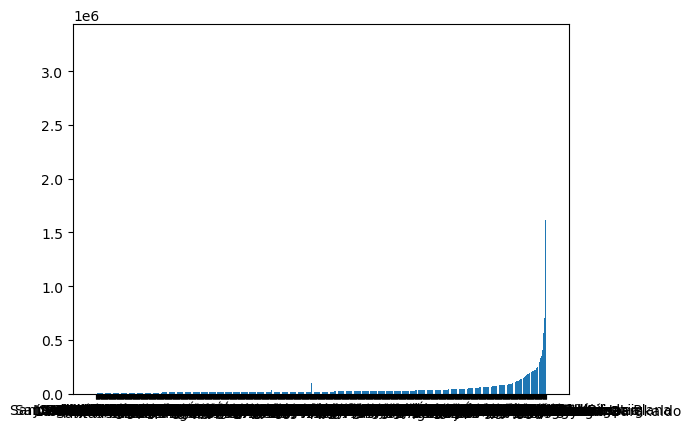

In [34]:
import matplotlib.pyplot as plt
plt.bar(datos['Texto'], datos['Poblacion'])

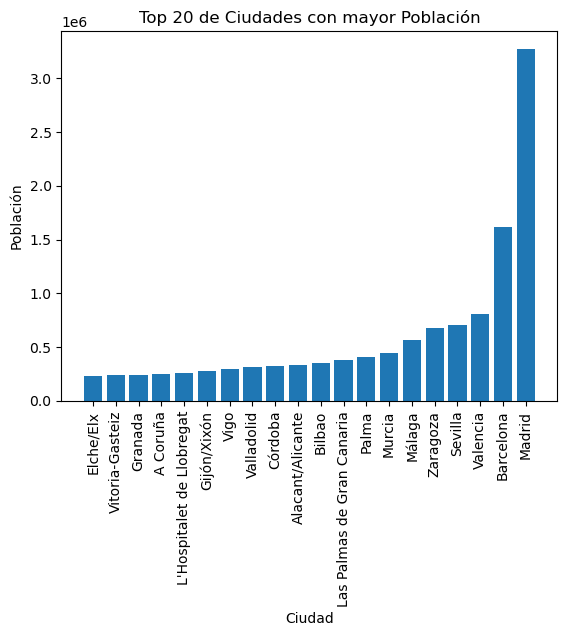

In [49]:
#Debido a que la gráfica es ilegible por la cantidad de elementos, retomo solo con las 20 ciudades más pobladas
top20 = datos.tail(20)
plt.bar(top20['Texto'], top20['Poblacion'])
plt.xlabel('Ciudad')
plt.ylabel('Población')
plt.title('Top 20 de Ciudades con mayor Población')
plt.xticks(rotation=90)
plt.show()

In [60]:
#En el gráfico se observa que la segunda ciudad más poblada es Barcelona
#Además, se observa que Granada ocupa el puesto número 18; pero eso también se puede calcular sin necesidad de contar barras
datos_desc = datos.sort_values('Poblacion', ascending=False).reset_index()
puesto_granada = datos_desc[datos_desc['Texto'] == 'Granada'].index[0]+1
print(f"Entre las ciudades más pobladas, Granada ocupa el puesto No. {puesto_granada}")

Entre las ciudades más pobladas, Granada ocupa el puesto No. 18


**Respuestas:**
> **a. La segunda ciudad más poblada es Barcelona**

> **b. Granada es la ciudad número 18 en el ranking de las más pobladas**

### 3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [76]:
municipios = dataset[
    (dataset['Provincia'] == 'Extremadura') &
    (dataset['Poblacion'] > 5000)
    ]
municipios

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y


In [78]:
#No hay registrado ningún municipio de Extremadura, ni con más de 5000 habitantes, ni con igual o menor cantidad.
#Lo anterior también se puede comprobar al hacer un value_counts de las provicias, ordenadas alfabéticamente (para una mejor búsqueda)
dataset['Provincia'].value_counts().sort_index()

Provincia
A Coruña                  23
Alacant/Alicante          45
Albacete                   6
Almería                   14
Asturias                  23
Badajoz                    9
Barcelona                 84
Burgos                     3
Cantabria                 14
Castelló/Castellón        13
Ceuta                      1
Ciudad Real               13
Cuenca                     2
Cáceres                    5
Cádiz                     24
Córdoba                   14
Girona                    19
Granada                   20
Guadalajara                4
Guipúzcoa                 19
Huelva                    13
Huesca                     6
Illes Balears             30
Jaén                      15
La Rioja                   4
Las Palmas                35
León                       9
Lleida                     5
Lugo                       5
Madrid                    56
Melilla                    1
Murcia                    46
Málaga                    32
Navarra                   11
Oure

**Respuesta: No hay ningún municipio de Extremadura, ni con más de 5000 habitantes, ni con otra cantidad**

### 4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [85]:
dataset.sort_values('Y', ascending=False)

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
104,104,105,Viveiro,16211.0,27066,Viveiro,27,Lugo,-7.588768,43.625578
447,447,448,Lluanco/Luanco,10788.0,33025,Gozón,33,Asturias,-5.792773,43.614030
443,443,444,Candás,11000.0,33014,Carreño,33,Asturias,-5.767181,43.590199
444,444,445,Piedrasblancas,22832.0,33016,Castrillón,33,Asturias,-5.973899,43.559984
442,442,443,Avilés,84202.0,33004,Avilés,33,Asturias,-5.924790,43.558577
...,...,...,...,...,...,...,...,...,...,...
6,6,7,Mogán,22638.0,35012,Mogán,35,Las Palmas,-15.726229,27.880172
758,758,759,Cruce de Sardina,24514.0,35022,Santa Lucía de Tirajana,35,Las Palmas,-15.430664,27.856854
760,760,761,Vecindario,11583.0,35022,Santa Lucía de Tirajana,35,Las Palmas,-15.446853,27.841727
759,759,760,El Doctoral,15012.0,35022,Santa Lucía de Tirajana,35,Las Palmas,-15.454505,27.832113


**Respuesta: El municipio ubicado más al norte es Viveiro, que pertenece a la provincia de Lugo y tiene una población de 16211 habitantes**

### 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [94]:
mun_granada = dataset[dataset['Provincia'] == 'Granada']
df_describe = mun_granada['Poblacion'].describe()
print("Media:", df_describe['mean'])
print("Mediana:", df_describe['50%'])
print("Desviación estándar:", round(df_describe['std'], 2))
print("Máxima:", df_describe['max'])
print("Mínima:", df_describe['min'])

Media: 30217.85
Mediana: 17526.0
Desviación estándar: 50355.49
Máxima: 239154.0
Mínima: 10386.0


### Respuesta: Para los municipios pertenecientes a Granada, los principales datos estadísticos respecto a la población, son:
>Media: 30217.85

>Mediana: 17526.0

>Desviación estándar: 50355.49

>Máxima: 239154.0

>Mínima: 10386.050355.49

### 6) Realice un histograma con la población de los Municipios para cada una de las provincias.

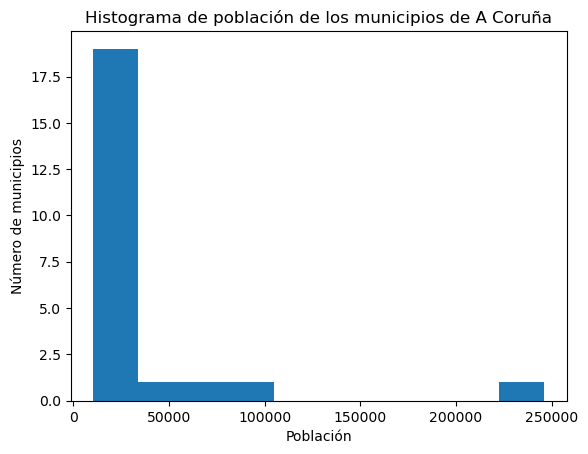

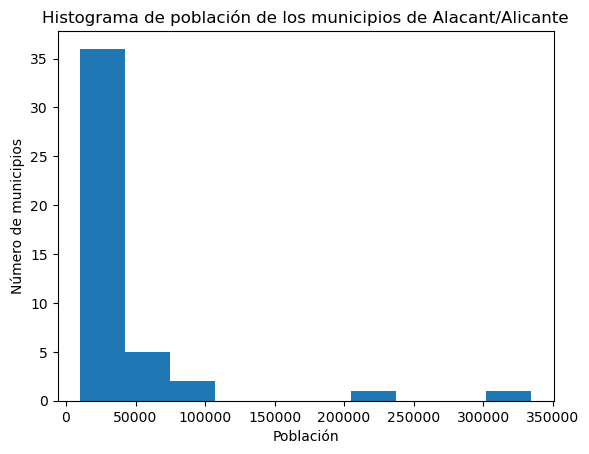

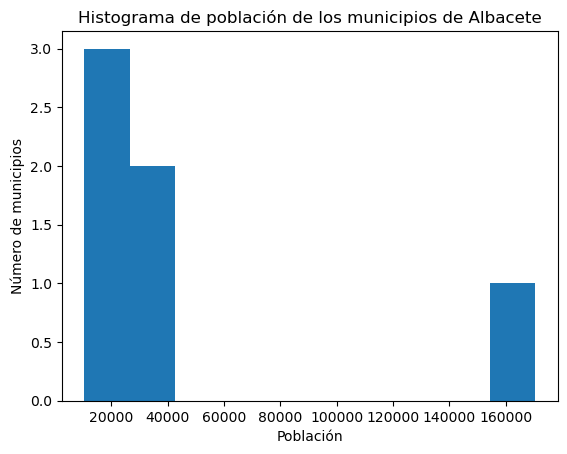

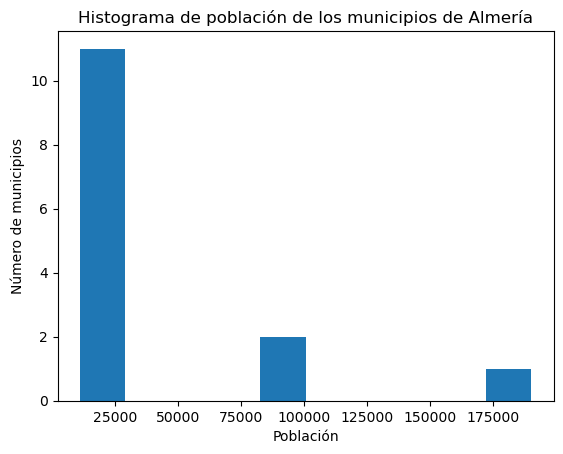

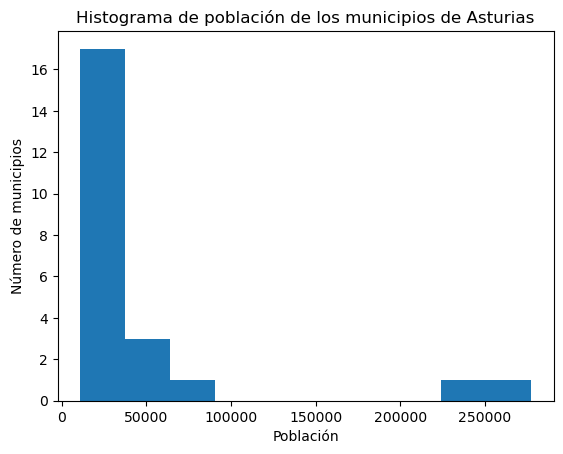

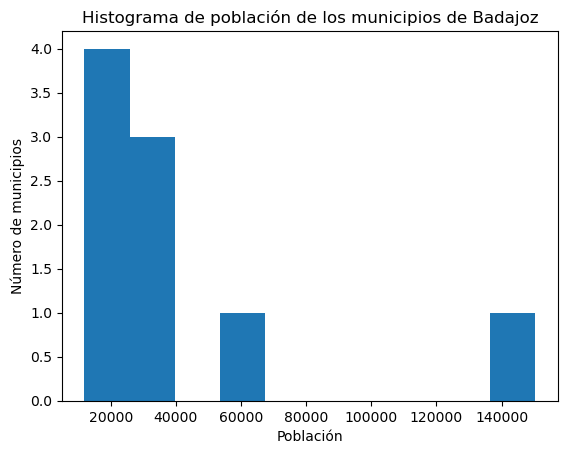

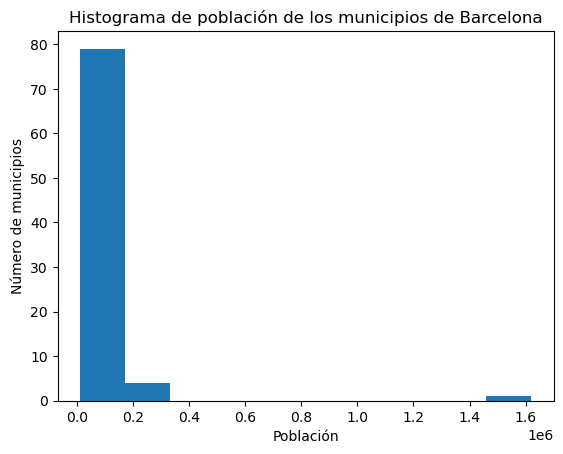

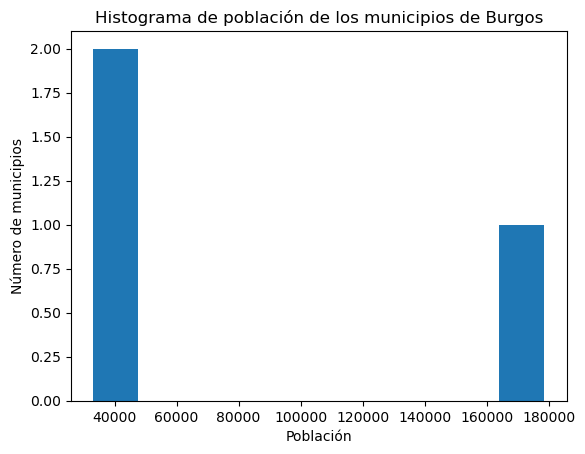

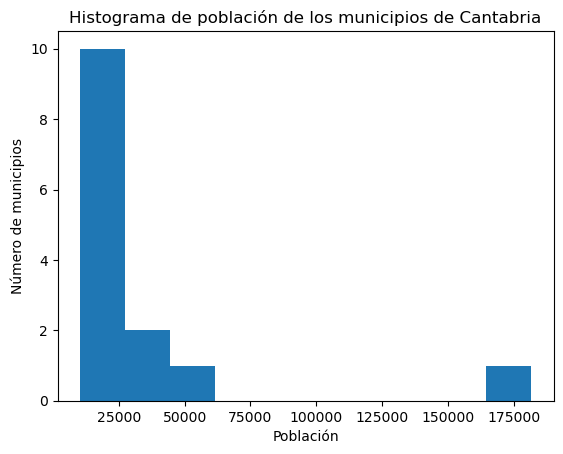

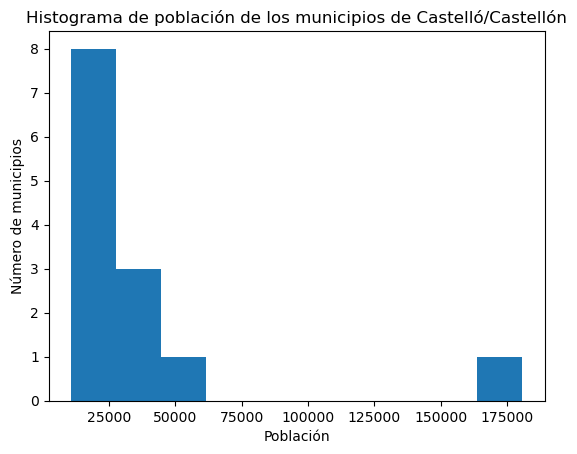

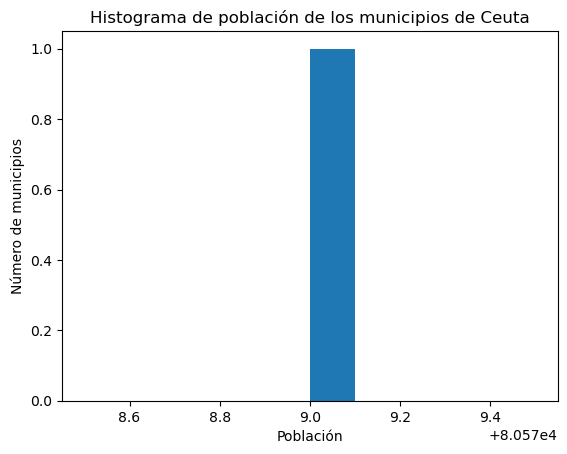

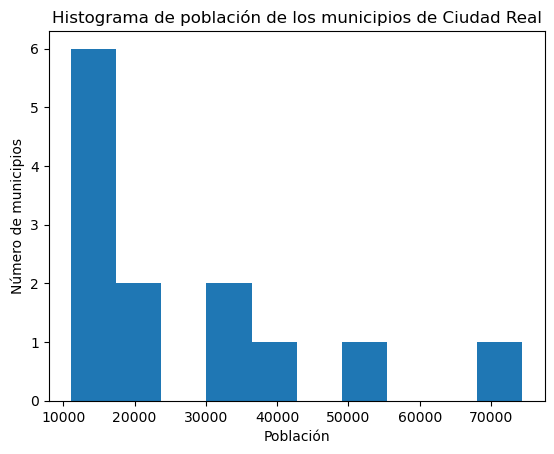

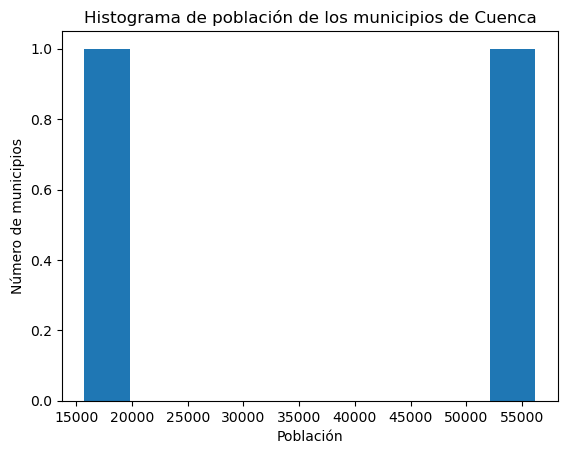

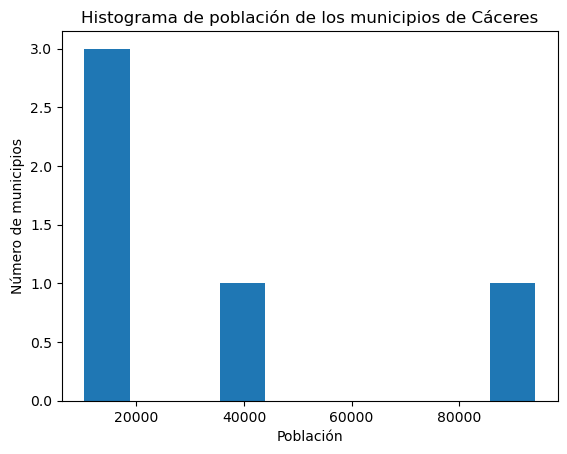

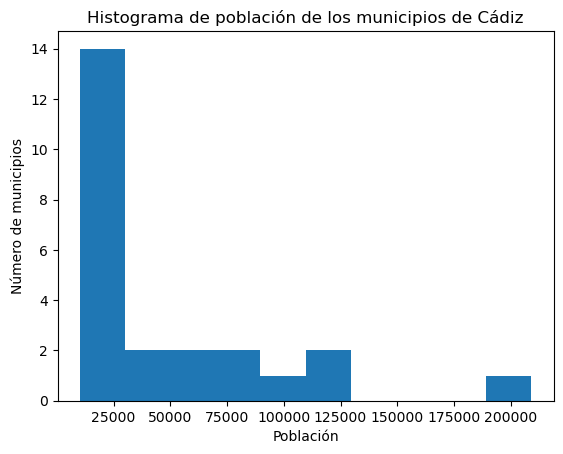

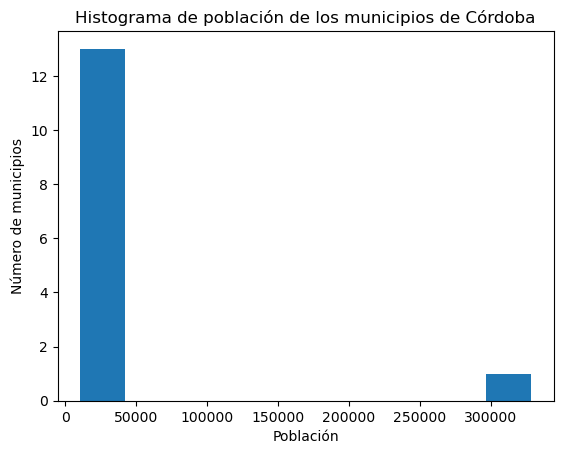

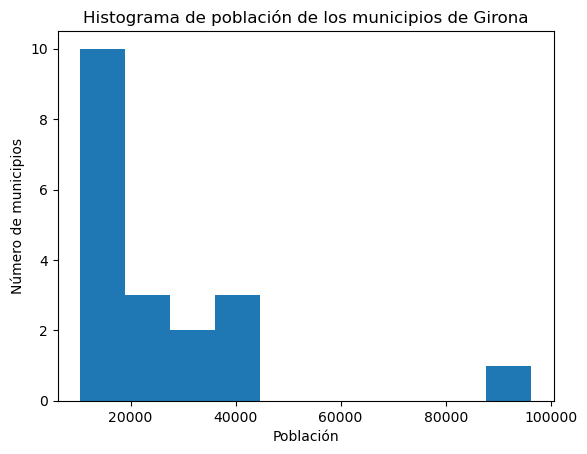

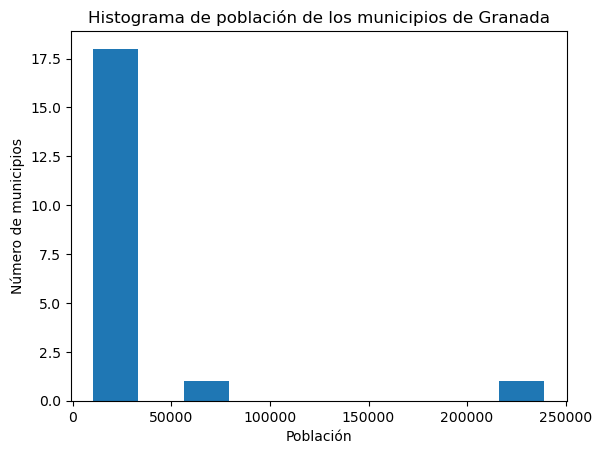

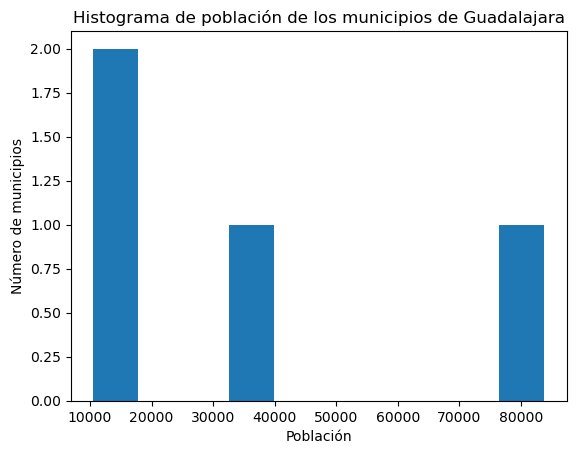

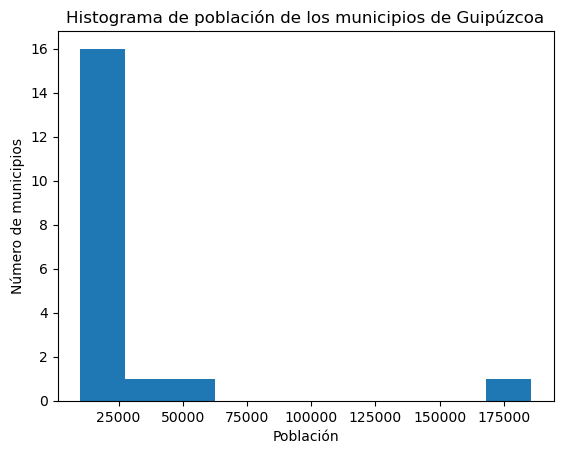

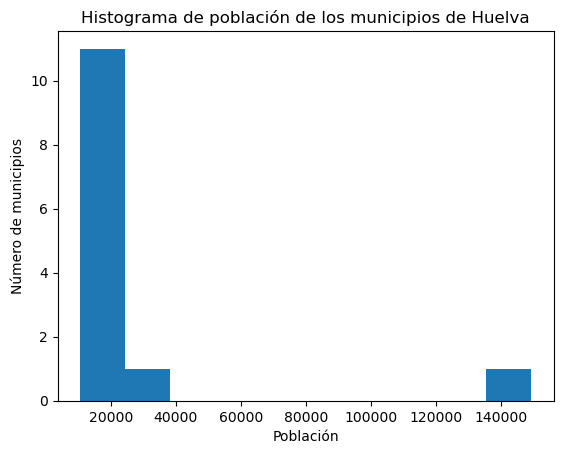

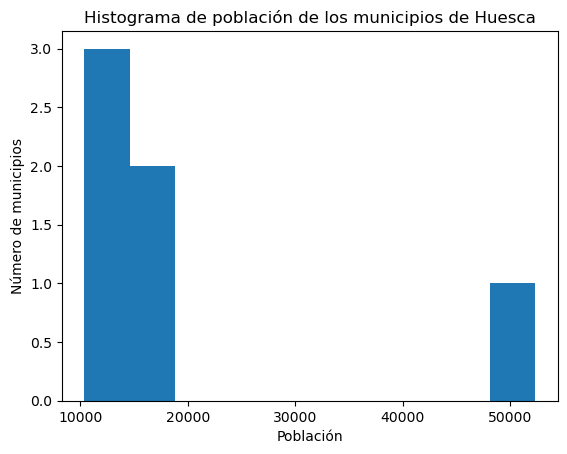

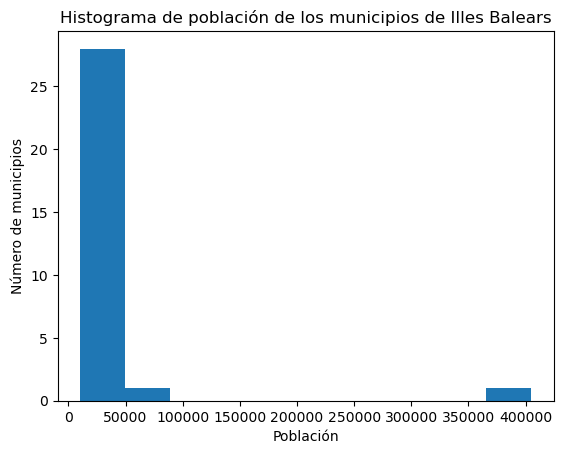

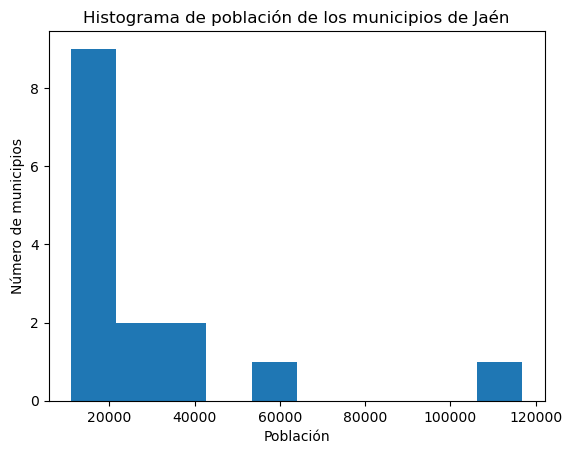

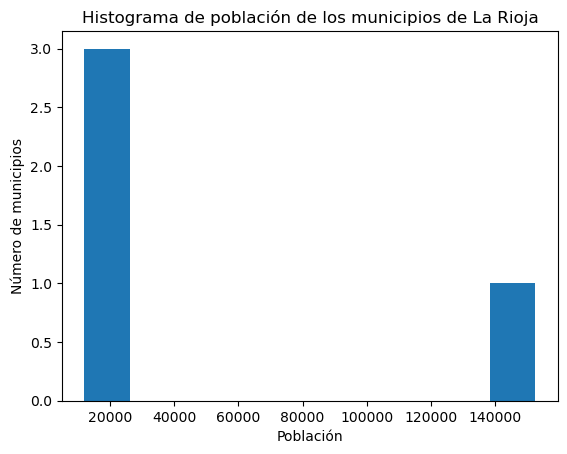

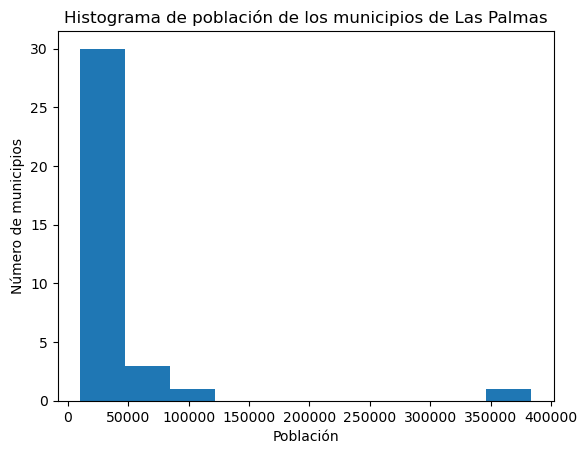

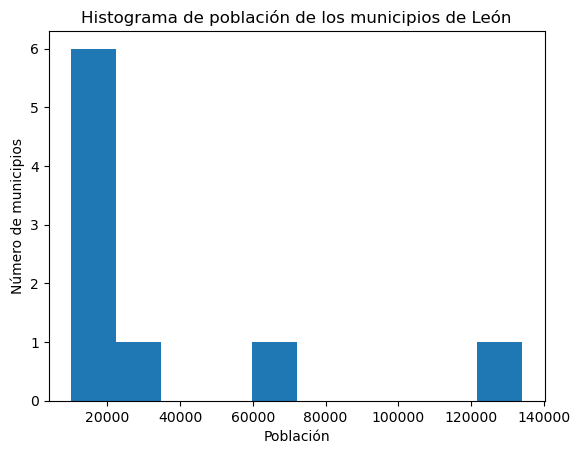

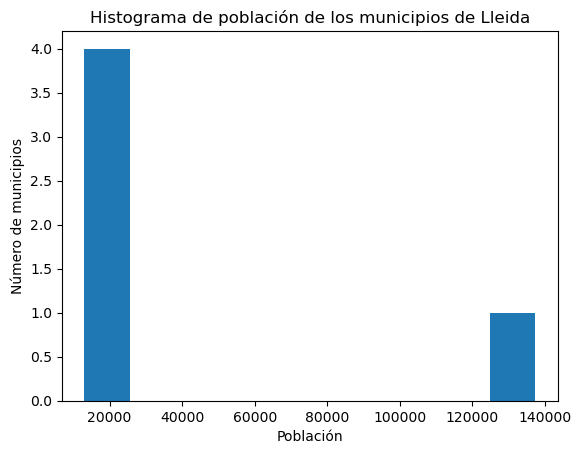

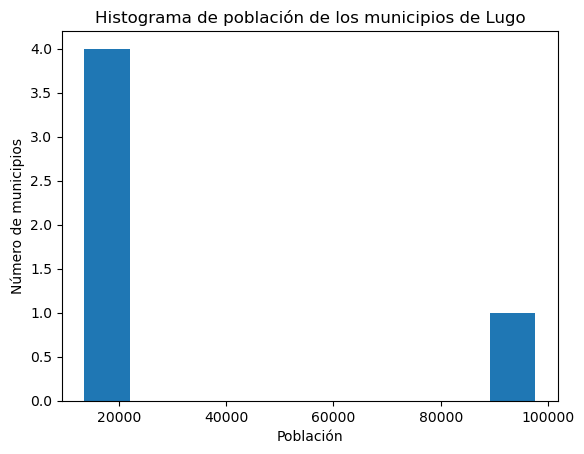

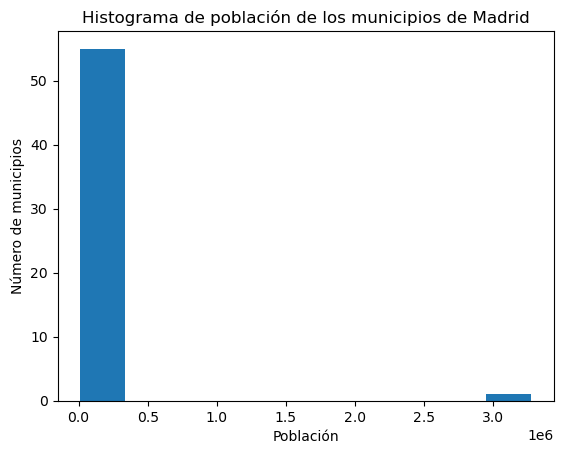

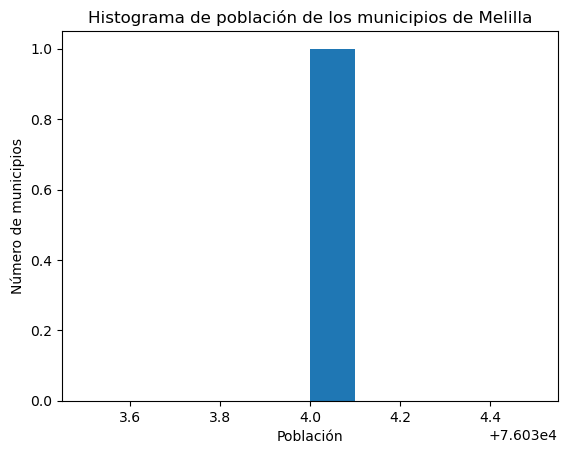

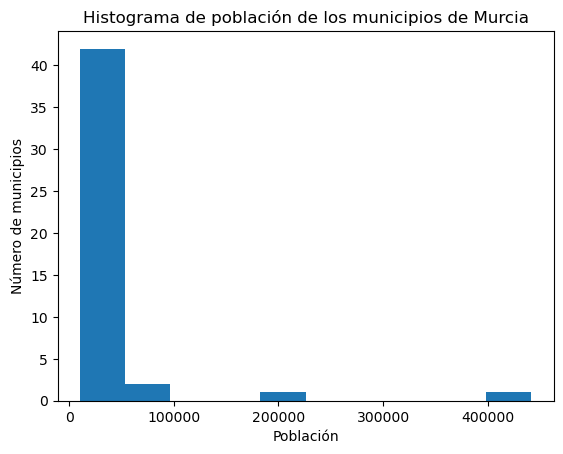

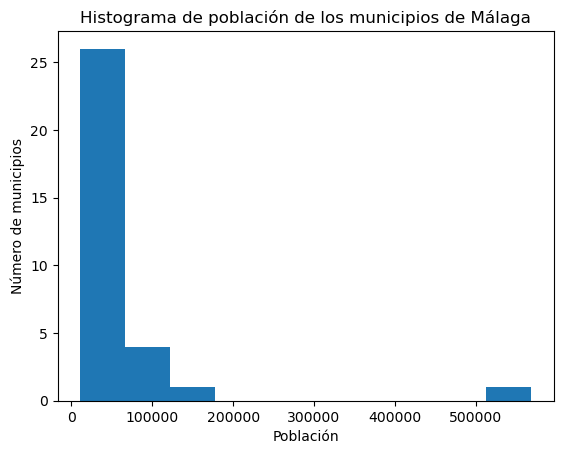

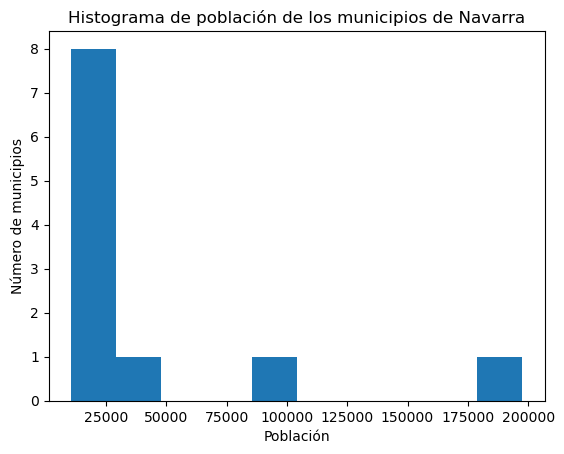

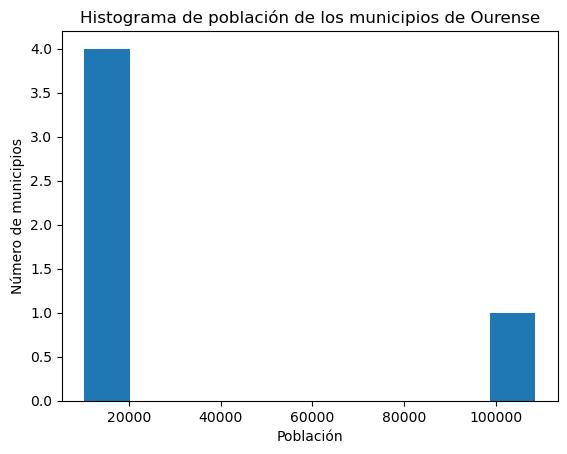

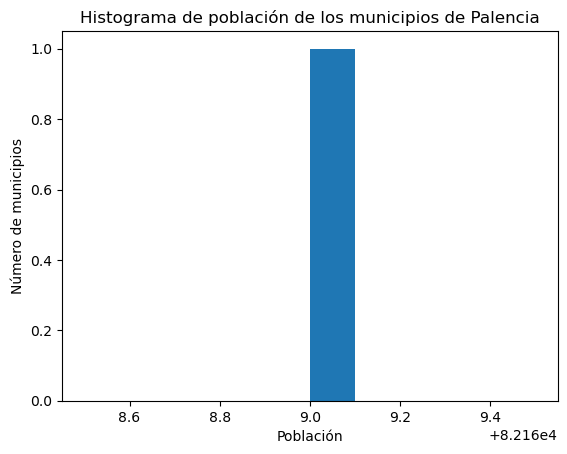

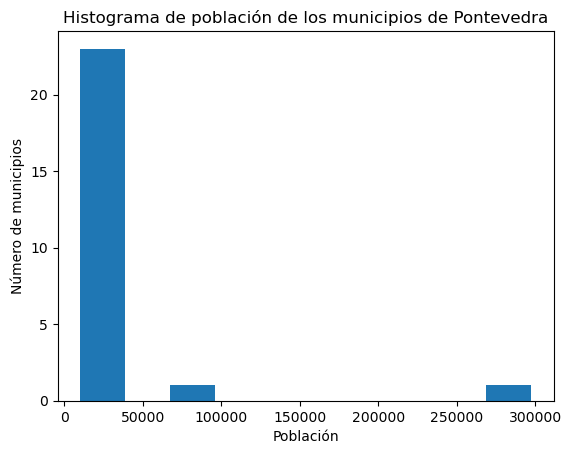

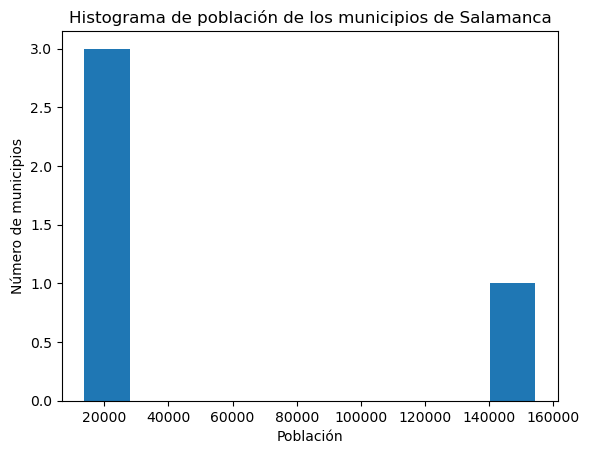

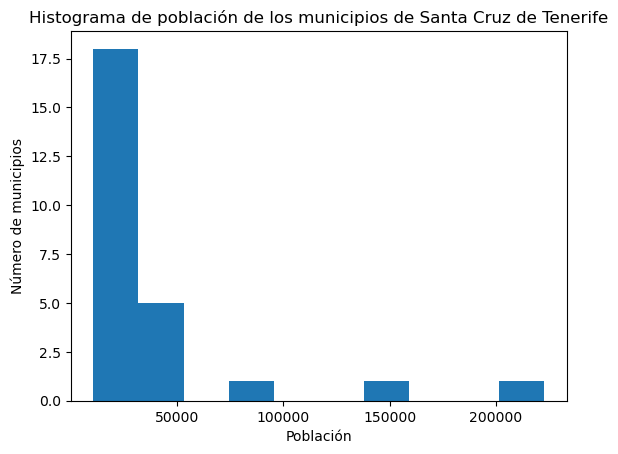

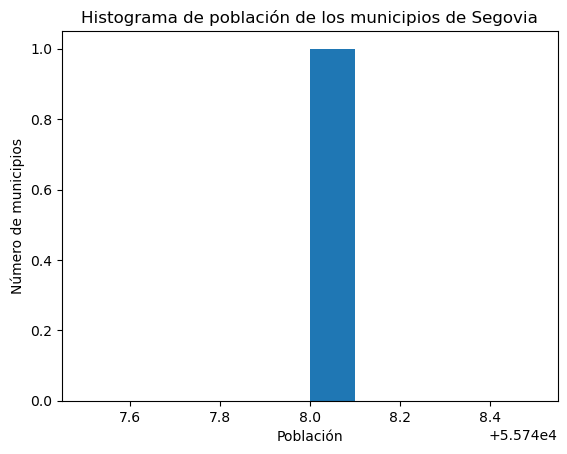

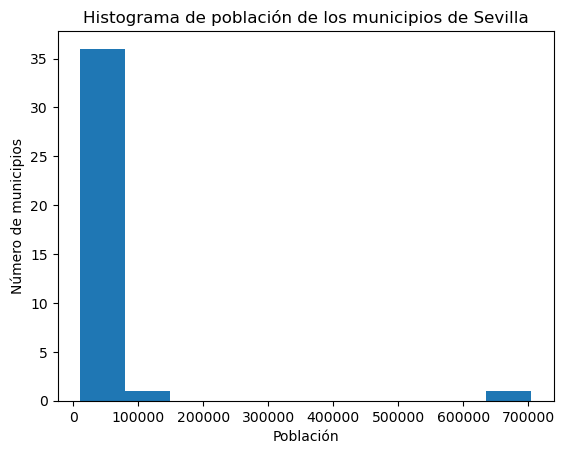

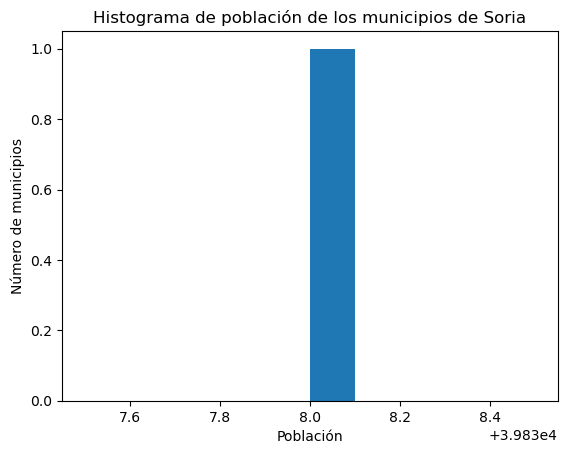

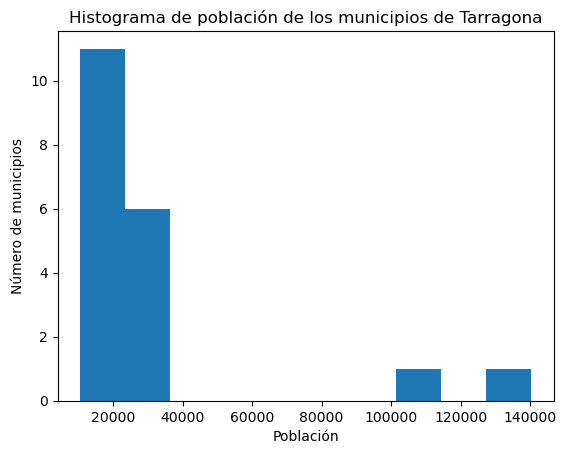

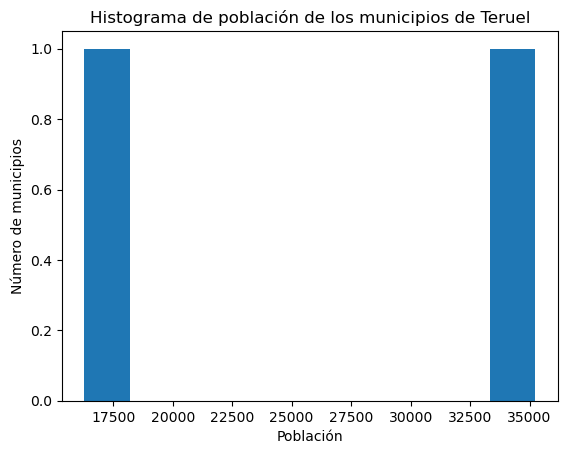

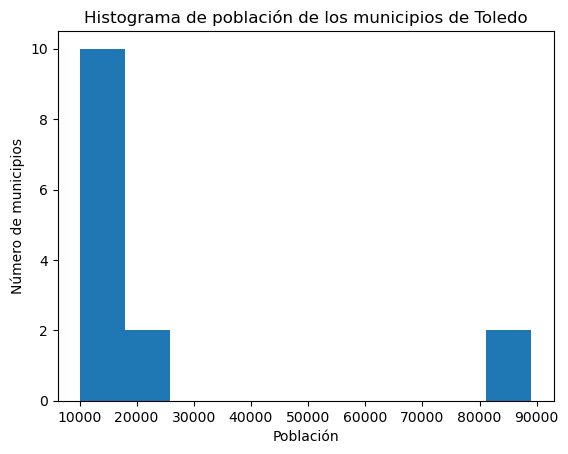

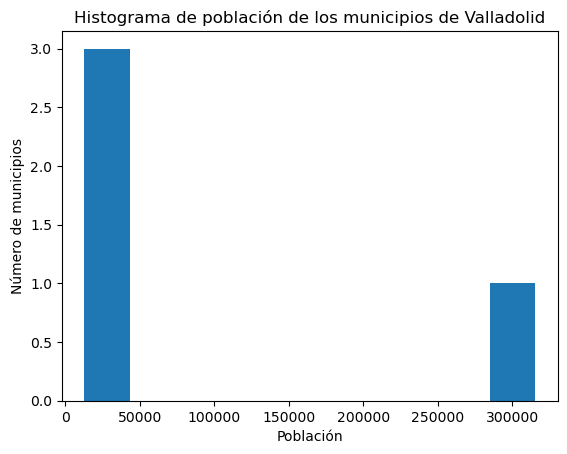

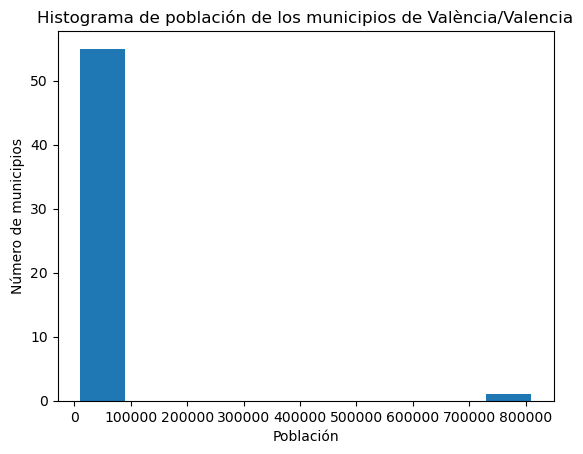

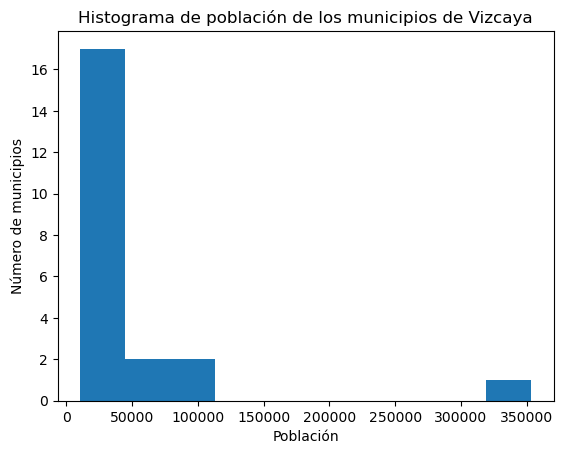

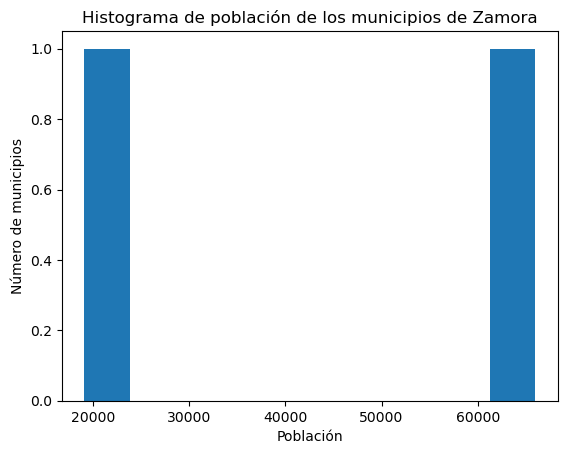

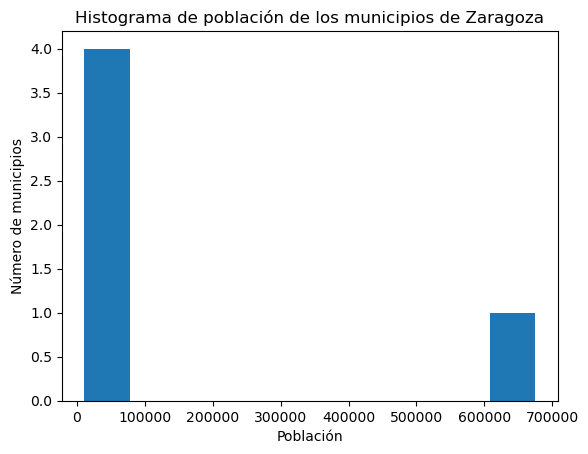

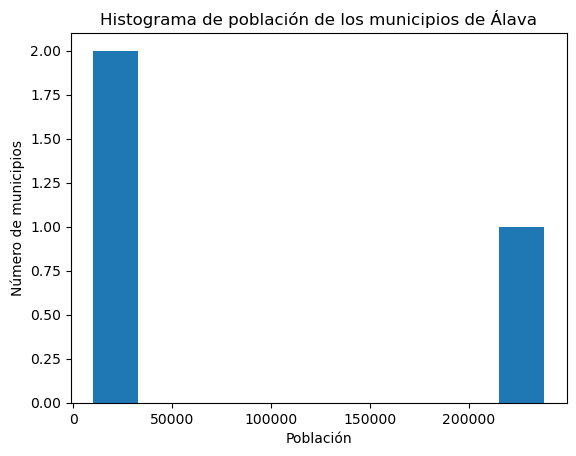

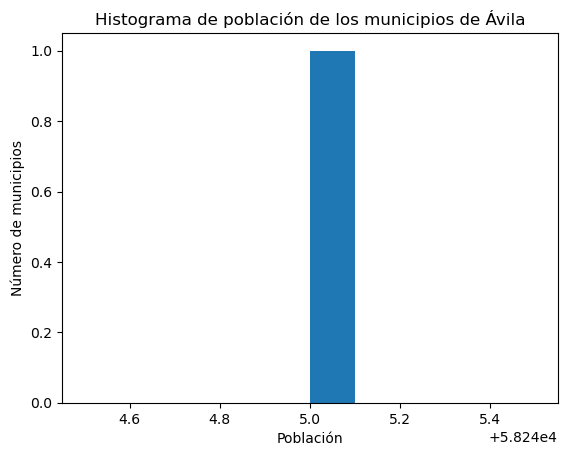

In [115]:
provincias = np.sort(dataset['Provincia'].unique())
for provincia in provincias:
    df_provincia = dataset[dataset['Provincia'] == provincia]
    plt.hist(df_provincia['Poblacion'])
    plt.xlabel('Población')
    plt.ylabel('Número de municipios')
    plt.title(f'Histograma de población de los municipios de {provincia}')
    plt.show()

### 7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [138]:
municipios_aleatorios = dataset.drop_duplicates(subset='Texto').sample(n=50)
prom = municipios_aleatorios['Poblacion'].mean()
dstd = municipios_aleatorios['Poblacion'].std()
print(f"Para los 50 municipios tomados al azar, la población promedio es de {prom}, con una desviación estándar de {round(dstd, 2)}")

Para los 50 municipios tomados al azar, la población promedio es de 54939.74, con una desviación estándar de 104817.41


**Respuesta: Dado que los municipios son tomados de manera aleatoria, en este caso no hay una respuesta fija**

### 8) Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [172]:
#Nota: No se especifrica la cantidad de municipios a identificar; desarrollo el ejercicio buscando los 5 más cercanos y los 5 más lejanos
'''
Nota 2: Las distancias se han calculado usando la fórmula de Harversine;
Si bien es cierto que aplicando Pitágoras se prodría lograr una aproximación
(por ser distancias relativamente cercanas en relación al tamaño de la tierra),
Lo correcto es no ignorar que se trata de distancias en una esfera.
'''

from math import radians, cos, sin, sqrt, asin

def calcular_distancia(x1, y1, x2, y2):
    x1, y1, x2, y2 = map(radians, [x1, y1, x2, y2]) #convierte las coordenadas a radianes
    #aplicando la fórmula de Harversine:
    dif_x = x2 - x1
    dif_y = y2 - y1
    a = sin(dif_y/2)**2 + cos(y1) * cos(y2) * sin(dif_x/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378 #radio de la Tierra en kilómetros
    return c * r

#extrae del dataset las coordenadas de Madrid y las almacena
x_madrid, y_madrid = dataset[dataset['Texto'] == 'Madrid'][['X', 'Y']].iloc[0]

municipios = dataset[dataset['Texto'] != 'Madrid'].copy() #Genera un nuevo dataset, sin Madrid
#en la tabla creada, se crea una columna en la que se almacena la distancia entre el municipio y Madrid
municipios['Distancia_Madrid'] = municipios.apply(lambda i: calcular_distancia(x_madrid, y_madrid, i['X'], i['Y']), axis=1)
municipios = municipios.sort_values('Distancia_Madrid', ascending=True)

***Municipios más cercanos a Madrid***:

In [174]:
municipios.head(5)

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,Distancia_Madrid
783,783,784,Humera-Somosaguas-prado del Rey,14800.0,28115,Pozuelo de Alarcón,28,Madrid,-3.783853,40.428764,6.917357
781,781,782,Fortuna,12840.0,28074,Leganés,28,Madrid,-3.780326,40.358067,9.197934
365,365,366,Pozuelo de Alarcón,82804.0,28115,Pozuelo de Alarcón,28,Madrid,-3.815816,40.435940,9.732751
780,780,781,El Bercial,12814.0,28065,Getafe,28,Madrid,-3.736771,40.327270,10.332850
354,354,355,Leganés,187227.0,28074,Leganés,28,Madrid,-3.766556,40.331744,10.845042


***Municipios más lejanos a Madrid***:

In [175]:
municipios.tail(5)

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,Distancia_Madrid
21,21,22,Adeje,43801.0,38001,Adeje,38,Santa Cruz de Tenerife,-16.729708,28.118880,1815.149274
764,764,765,Playa de las Américas,18562.0,38001,Adeje,38,Santa Cruz de Tenerife,-16.729436,28.068070,1819.612845
765,765,766,Los Cristianos,19383.0,38006,Arona,38,Santa Cruz de Tenerife,-16.716798,28.053827,1820.113574
35,35,36,Santa Cruz de la Palma,17128.0,38037,Santa Cruz de la Palma,38,Santa Cruz de Tenerife,-17.765386,28.684138,1830.571744
29,29,30,Los Llanos de Aridane,20948.0,38024,Los Llanos de Aridane,38,Santa Cruz de Tenerife,-17.914361,28.658639,1842.244542
